# Plotting History of Robot States

This script should extract the data history.p in the ./data folder

Data:
see below and IDM.py for what arrays are included

Jake Sganga
2/4/2016


In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
# import mpld3
# mpld3.enable_notebook() # allows you to zoom
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



sns.set_style("dark")
sns.set_context("talk")

blue, green, red, purple = sns.color_palette("deep")[:4]
color_list = [blue, green, red, purple]

In [4]:
plt.get_cmap('Blues')


## Ascension Data

Auto generated when we call the get_position function, which returns the asynchronous data dict

See idm.GetHistoryArray() to verify the naming convention is valid

In [5]:
with open( "../robot/data/history.p", "rb" ) as input_file:
            history = pickle.load(input_file)
history.shape

FileNotFoundError: [Errno 2] No such file or directory: '../robot/data/history.p'

In [233]:
time_pts, x_sensed, x_raw, x_desired, q, q_desired, q_raw, J, W, R, angles, amps, amps_raw, force, force_raw = history.T

# For some reason this gives you 1D arrays of arrays that won't let you index through them. Below allows that.
time_pts = np.asarray(list(time_pts))
x_sensed = np.asarray(list(x_sensed))
x_raw = np.asarray(list(x_raw))
x_desired = np.asarray(list(x_desired))
q = np.asarray(list(q))
q_desired = np.asarray(list(q_desired))
q_raw = np.asarray(list(q_raw))
# J = np.asarray(list(J))
J_full = np.zeros((len(time_pts), 5, 10))
for ix, j in enumerate(J):
    m,n = j.shape
    J_full[ix, :m, :n] = j
J = J_full
W = np.asarray(list(W))
R = np.asarray(list(R))
angles = np.asarray(list(angles))
amps = np.asarray(list(amps))
amps_raw = np.asarray(list(amps_raw))
force = np.asarray(list(force))
force_raw = np.asarray(list(force_raw))
# print(x_sensed.shape,x_full.shape, x_raw.shape, x_true.shape)
x, y, z, a, e = x_sensed[:,0],x_sensed[:,1], x_sensed[:,2],x_sensed[:,3],x_sensed[:,4]

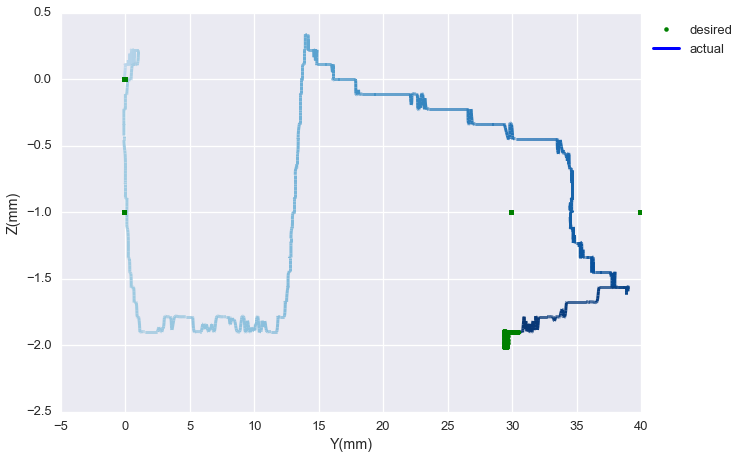

In [234]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
start_pt =0
end_pt = 25000
yt = y[start_pt:end_pt]
zt = z[start_pt:end_pt]

t = np.linspace(2, 10, len(y))

points = np.array([yt,zt]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap=plt.get_cmap('Blues'),
                    norm=plt.Normalize(0, 10))
lc.set_array(t)
lc.set_linewidth(3)
lc.set_label('actual')
plt.gca().add_collection(lc)
plt.plot(x_desired[1:,1], x_desired[1:,2], 'g.', label = 'desired')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])
plt.grid(True)
plt.xlabel('Y(mm)')
plt.ylabel('Z(mm)')
side = 20
# plt.axis((-side,side,-side,side))

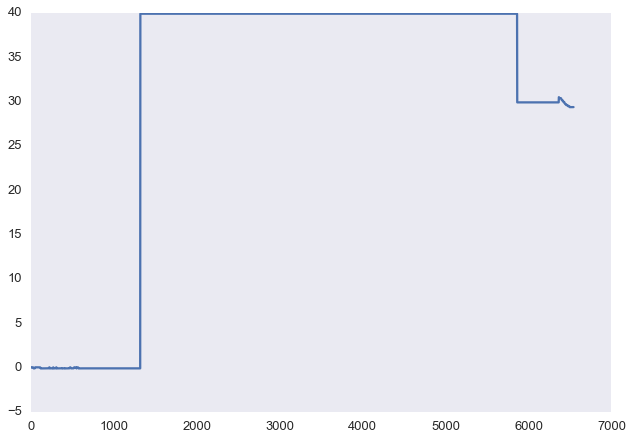

In [235]:
plt.plot(x_desired[:,1])

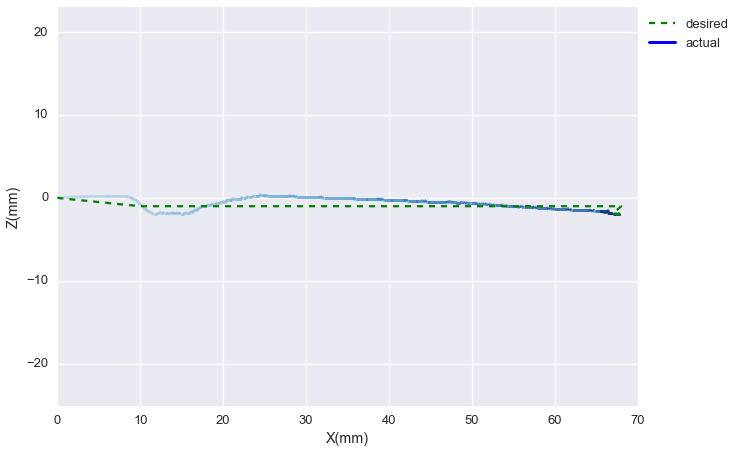

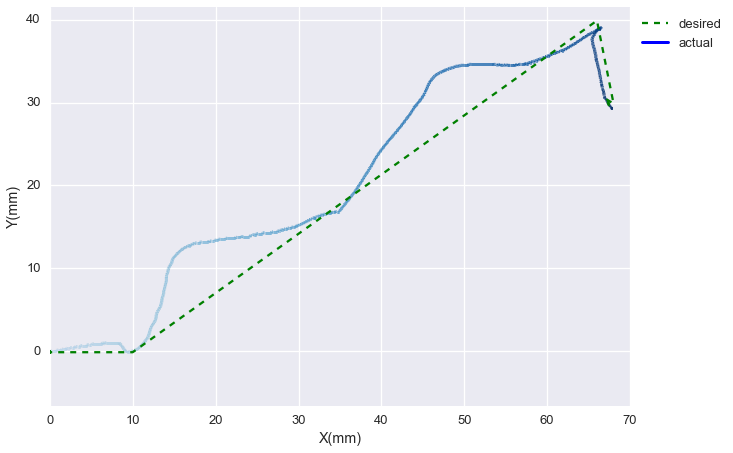

In [236]:
points = np.array([x, z]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap=plt.get_cmap('Blues'),
                    norm=plt.Normalize(0, 10))
lc.set_array(t)
lc.set_linewidth(3)
lc.set_label('actual')
plt.gca().add_collection(lc)
plt.plot(x_desired[:,0], x_desired[:,2], 'g--', label = 'desired')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])
plt.grid(True)
plt.xlabel('X(mm)')
plt.ylabel('Z(mm)')
plt.axis('equal')
side = 20
# plt.axis((-side,side,-side,side))


fig2 = plt.figure()
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=plt.get_cmap('Blues'),
                    norm=plt.Normalize(0, 10))
lc.set_array(t)
lc.set_linewidth(3)
lc.set_label('actual')
plt.gca().add_collection(lc)
plt.plot(x_desired[:,0], x_desired[:,1], 'g--', label = 'desired')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])
plt.grid(True)
plt.xlabel('X(mm)')
plt.ylabel('Y(mm)')
plt.axis('equal')
side = 20
# plt.axis((-side,side,-side,side))

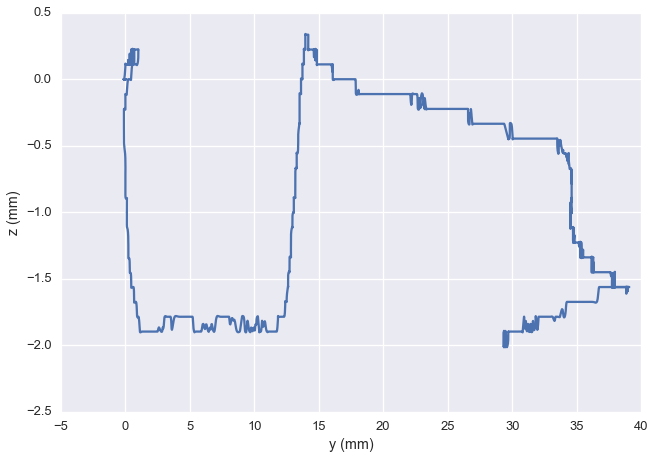

In [237]:
# plt.plot(x_raw[:,1], x_raw[:,2],'.', alpha = 0.25)
plt.plot(x_sensed[:,1],x_sensed[:,2], '-')
plt.xlabel('y (mm)')
plt.ylabel('z (mm)')
plt.grid(True)

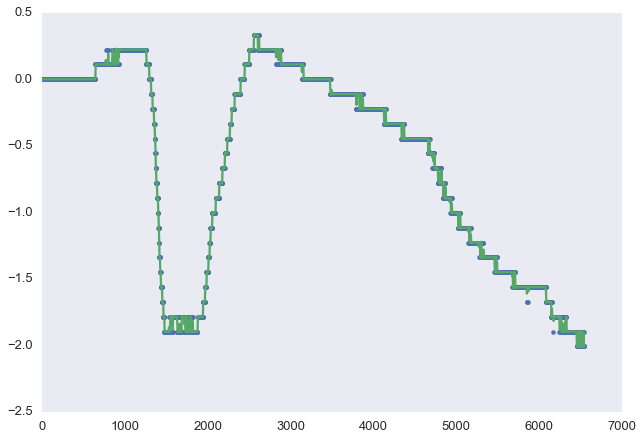

In [238]:
plt.plot(x_raw[:,2],'.')
plt.plot(x_sensed[:,2],'-')


In [239]:
# from matplotlib.collections import LineCollection
# from matplotlib.colors import ListedColormap, BoundaryNorm

# t = np.linspace(2, 10, len(y))

# points = np.array([y,z]).T.reshape(-1, 1, 2)
# segments = np.concatenate([points[:-1], points[1:]], axis=1)

# lc = LineCollection(segments, cmap=plt.get_cmap('Blues'),
#                     norm=plt.Normalize(0, 10))
# lc.set_array(t)
# lc.set_linewidth(3)
# lc.set_label('actual')
# plt.gca().add_collection(lc)
# plt.plot(x_desired[1:,1], x_desired[1:,2], 'g--', label = 'desired')
# plt.legend(loc=0, borderaxespad=0)
# plt.grid(True)
# plt.xlabel('Y(mm)')
# plt.ylabel('Z(mm)')
# side = 20
# plt.axis((-side,side,-side,side))


# color_index = [0, 1, 0, 1, 2, 3, 2, 3, 4,4,4,4] # matching the colors for antagonistic cables
# x_num, q_num = J[0,:].shape
# print(q_num)
# y_scale = 1
# z_scale = -1
# ind_location = 100
# ind_list = np.linspace(10, len(time_pts) - 1, 10).astype(int)
# print(ind_list)
# for ind_location in ind_list:
#     for i in range(q_num):
#         if i == q_num - 1:
#             y_scale = -y_scale
#             z_scale = -z_scale
#         y_loc = y[ind_location]
#         z_loc = z[ind_location]
#         plt.plot([y_loc, y_loc + y_scale * J[ind_location, 1, i]], [z_loc, z_loc + z_scale * J[ind_location, 2, i]], 
#                  color = sns.color_palette()[color_index[i]])

note on this plot: the jagged 90 deg moves for x_desired is likely stemming from the button 'A' - homing command, which leaves the normal loop and, therefore, does not update the x_desired.

skeptical about this plot becuase it calculates x_desired as x_current + dx_desired (which is quite small)

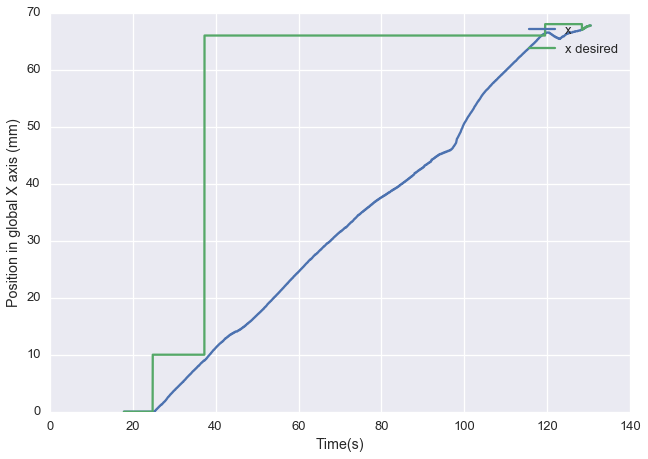

In [240]:
plt.plot(time_pts, x, '-')
plt.plot(time_pts, x_desired[:,0], '-')
plt.legend(['x', 'x desired'])
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Position in global X axis (mm)')

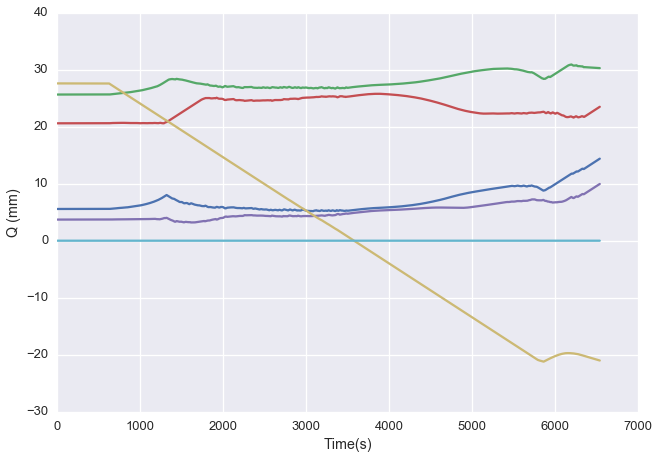

In [241]:
ts = 0
te = 300000
# plt.plot(time_pts[ts:te], q[ts:te,:],'-')
plt.plot(q_desired[ts:te,4:10],'-')
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Q (mm)')

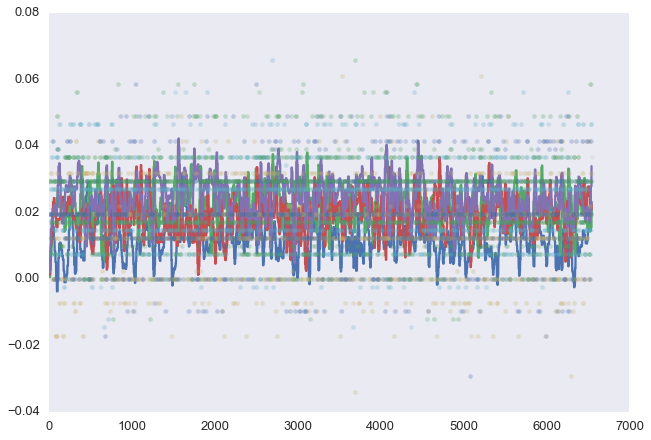

In [242]:
ts = 0
te = 60000
plt.plot(amps[ts:te,0:4])
plt.plot(amps_raw[ts:te,0:4], '.', alpha = 0.05)

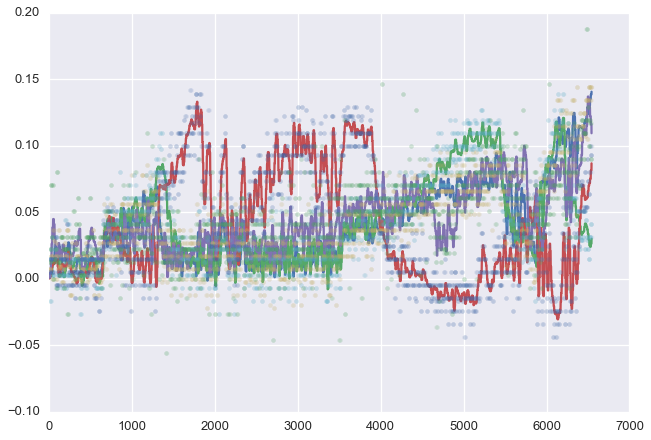

In [243]:
ts = 0
te =20000
plt.plot(amps[ts:te,4:8])
plt.plot(amps_raw[ts:te,4:8], '.', alpha = 0.05)
plt.grid(True)
# regions = [1000, 2500, 3750, 6500, 8000, 9500, 11000, 12250,13750, 15000]
# for r in regions:
#     plt.plot([r, r], [-0.05, 0.25], 'k', alpha = 0.25)

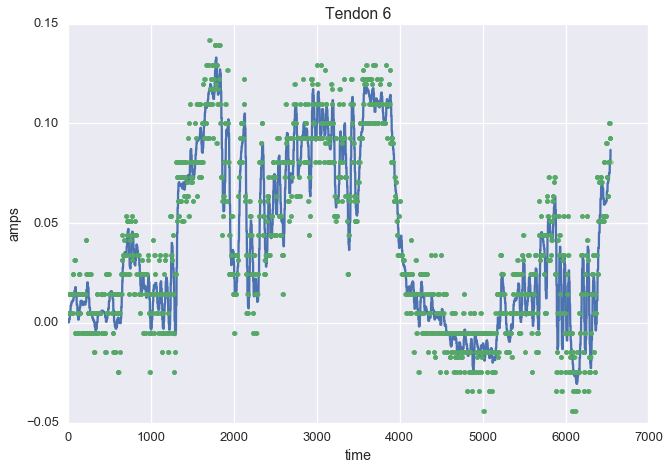

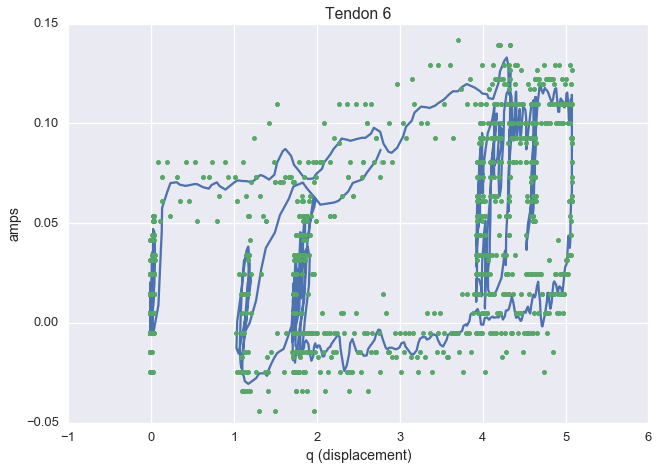

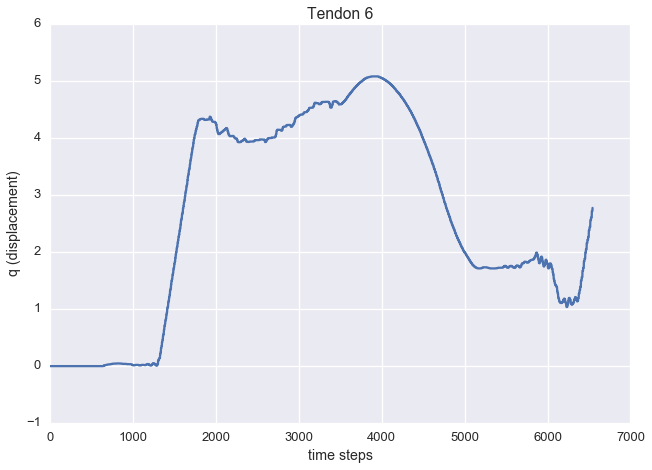

In [244]:
ts = 0
te =20000
plt.plot(amps[ts:te,6], label = 'Filtered')
plt.plot(amps_raw[ts:te,6], '.', alpha = 0.5, label = 'raw')
plt.xlabel('time')
plt.ylabel('amps')
plt.title('Tendon 6')
plt.grid(True)
plt.figure()
plt.plot(q[ts:te,6],amps[ts:te,6], label = 'Filtered')
plt.plot(q[ts:te,6],amps_raw[ts:te,6], '.', alpha = 0.5, label = 'raw')
plt.xlabel('q (displacement)')
plt.ylabel('amps')
plt.title('Tendon 6')
plt.grid(True)
plt.figure()
plt.plot(q[ts:te,6])
plt.ylabel('q (displacement)')
plt.xlabel('time steps')
plt.title('Tendon 6')
plt.grid(True)

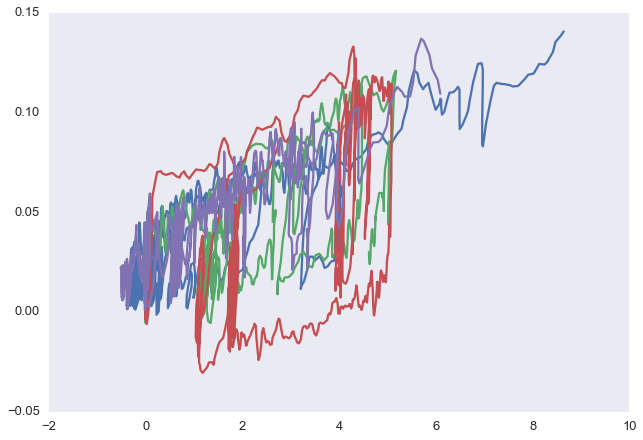

In [245]:
ts = 0
te = 20000
for i in range(4,8):
    plt.plot(q[ts:te,i], amps[ts:te,i])

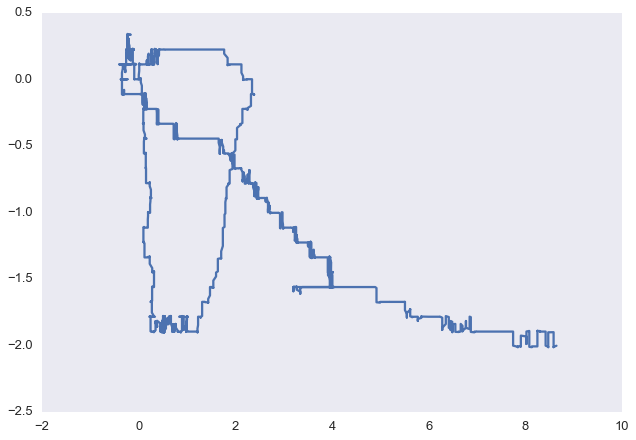

In [246]:
ts = 0
te = 30000
plt.plot( q[ts:te,4], z[ts:te])

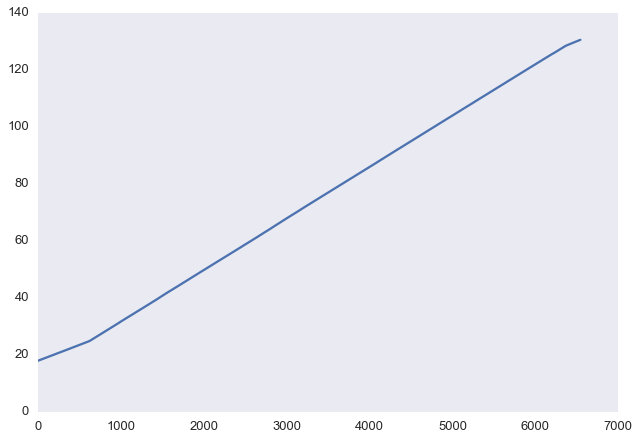

In [247]:
plt.plot(time_pts)

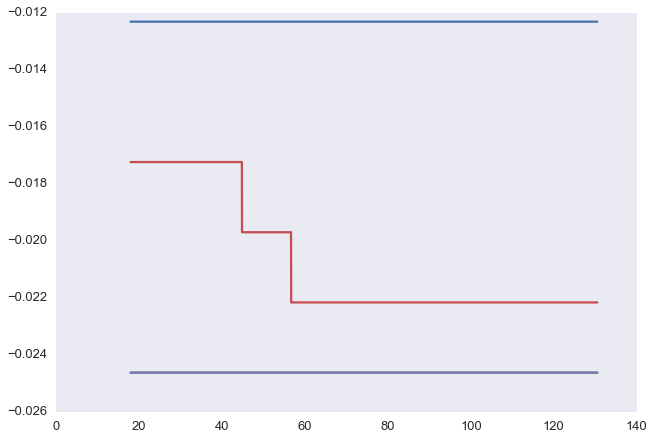

In [248]:
plt.plot(time_pts, q[:,:4],'-')


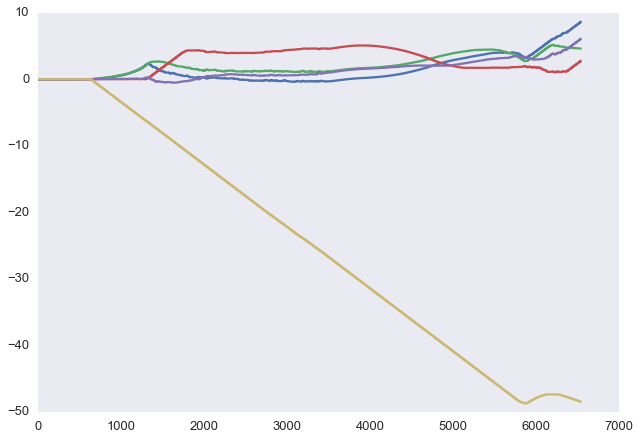

In [249]:
plt.plot(q[:,4:9],'-')


In [250]:
J.shape
# print(J[1050])

(6543, 5, 10)

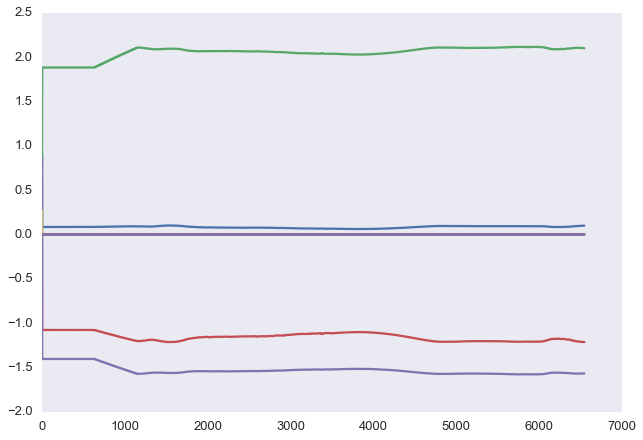

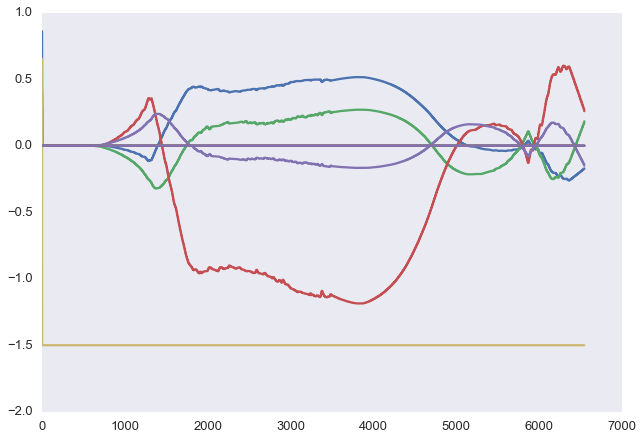

In [251]:
plt.plot(J[:,0,:])
plt.figure()
plt.plot(J[:,2,:])

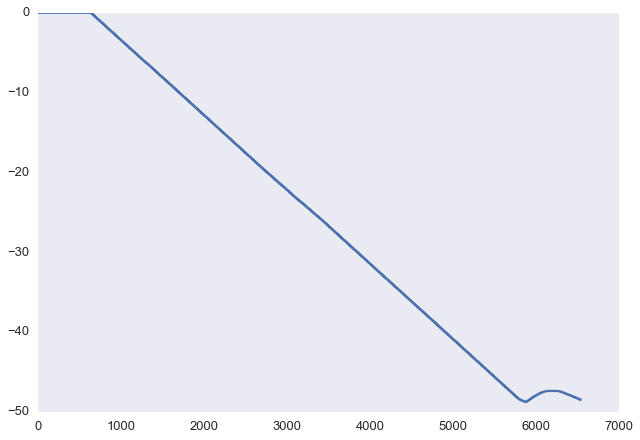

In [252]:
plt.plot(q[:,8])

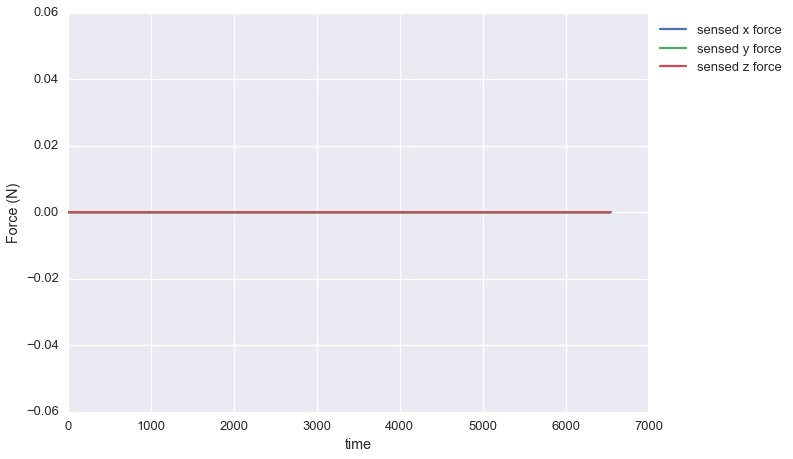

In [253]:
# plt.plot(force_raw[:,0], '.', label = 'raw x')
plt.plot(force[:,0], label = 'sensed x force')
plt.plot(-force[:,1], label = 'sensed y force')
plt.plot(force[:,2], label = 'sensed z force')
force_mag = [np.sqrt(f.dot(f)) for f in force[:,:3]]
plt.xlabel('time')
plt.ylabel('Force (N)')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])
plt.grid(True)
# plt.ylim([-.01, .015])

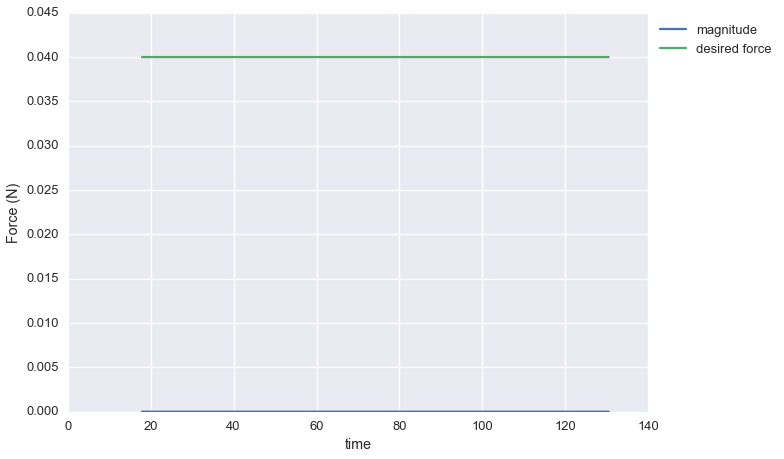

In [254]:
# plt.plot(time_pts, force_mag, label = 'magnitude')
plt.plot(time_pts, force[:,2], label = 'magnitude')

plt.plot(time_pts, 0*time_pts + 0.04, label = 'desired force')
plt.xlabel('time')
plt.ylabel('Force (N)')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])
plt.grid(True)

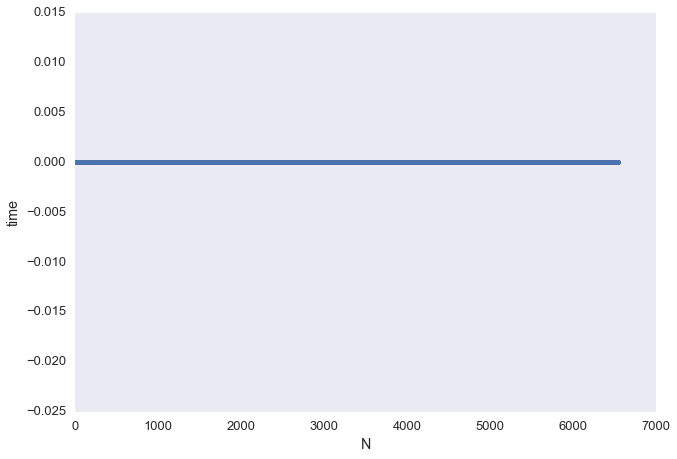

In [255]:
plt.plot(force_raw[:,0], '.')
plt.ylim([-.025, .015])
plt.xlabel('N')
plt.ylabel('time')

In [256]:
import sys
sys.path.append("C:\\Users\\Auris\\Google Drive\\Research\\Git_code\\soft_robots\\PythonModel")
from robot_model.private.ModelInterface import catheter
robot = catheter()


In [257]:
num = 10
def getModelPrediction(q_offset, q_scale):
    q_model = (q-q_offset).dot(q_scale)
    body = np.asarray([robot.getPointsAlongBody(qi, num) for qi in q_model])
    print(body.shape)
    return body

In [258]:
q_offset = np.zeros(10)
q_offset[-1] = -40
body = getModelPrediction(q_offset, np.eye(10))

AttributeError: 'catheter' object has no attribute 'length'

In [ ]:
body.shape
print(q[0,:])

In [ ]:
blue  = sns.color_palette("deep")[0]
green = sns.color_palette("deep")[1]

i_list = np.linspace(0, body.shape[0]-1, 50)
print(len(i_list))
for ix, i in enumerate(i_list):
    i = int(i)
    plt.plot(body[i, :num,1], body[i, :num,2], color = blue, alpha = ix/len(i_list))
    plt.plot(body[i, num:,1], body[i, num:,2], color = green, alpha = ix/len(i_list))
plt.axes().set_aspect('equal')
plt.xlabel('y')
plt.ylabel('z')

In [ ]:
for ix, i in enumerate(i_list):
    i = int(i)
    plt.plot(body[i, :num,0], body[i, :num,1], color = blue, alpha = ix/len(i_list))
    plt.plot(body[i, num:,0], body[i, num:,1], color = green, alpha = ix/len(i_list))
plt.axes().set_aspect('equal')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

In [ ]:
for ix, i in enumerate(i_list):
    i = int(i)
    plt.plot(body[i, :num,0], body[i, :num,2], color = blue, alpha = ix/len(i_list))
    plt.plot(body[i, num:,0], body[i, num:,2], color = green, alpha = ix/len(i_list))
plt.axes().set_aspect('equal')
plt.xlabel('x (mm)')
plt.ylabel('z (mm)')

In [ ]:
plt.plot(a * 180/np.pi)
plt.plot(e * 180/np.pi)

In [ ]:
for ix, i in enumerate(i_list):
    i = int(i)
#     plt.plot(body[i, :10,3], -body[i, :10,4], color = blue, alpha = ix/len(i_list))
    plt.plot( -body[i, num:,2], color = green, alpha = ix/len(i_list))

In [ ]:
plt.plot(z)
plt.plot(body[:,-1,2],'--')

In [ ]:
plt.plot(x_sensed[:,0])
plt.plot(x_sensed[:,1])
plt.plot(x_sensed[:,2])


In [ ]:
plt.plot(body[:,-1,0] - body[0,-1,0],'--')
plt.plot(body[:,-1,1],'--')
plt.plot(body[:,-1,2],'--')

In [ ]:
ts = 0
te = 30000
plt.plot(body[ts:te,-1,1], body[ts:te,-1,2],'--', label = 'model')
plt.plot(x_sensed[ts:te,1], x_sensed[ts:te,2], label = 'robot')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])


In [ ]:
ts = 2000
te = 6000
plt.plot(body[ts:te,-1,1], body[ts:te,-1,2],'--')
plt.plot(x_sensed[ts:te,1], x_sensed[ts:te,2])

In [ ]:
ts = 0
te = 60000
plt.plot(q[ts:te,8], x_sensed[ts:te, 0],'--')
plt.plot(q[ts:te,8], -body[ts:te,-1,0] + 100,'--')
# Q = np.ones((len(q[:,8]), 2))
# Q[:,0] = q[:,8]
# print(Q)
# print(np.linalg.pinv(Q).dot(x))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
step = 1000
x, y, z, a, e = x_sensed[:,0],x_sensed[:,1], x_sensed[:,2],x_sensed[:,3],x_sensed[:,4]
x_t = x[0:step:]
y_t = y[0:step:]
z_t = z[0:step:]

ax.scatter(x_t,y_t,z_t)

plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
ax.set_zlabel('z (mm)')
ax.view_init(elev=20, azim=50)

In [ ]:

for i in range(3):
    plt.figure()
    plt.plot(body[:,-1,i],'--')
    plt.plot(x_sensed[:,i])
    

In [ ]:
plt.plot(q[:,0], z)
plt.axes().set_aspect('equal')


In [ ]:
plt.plot(R[:,2])

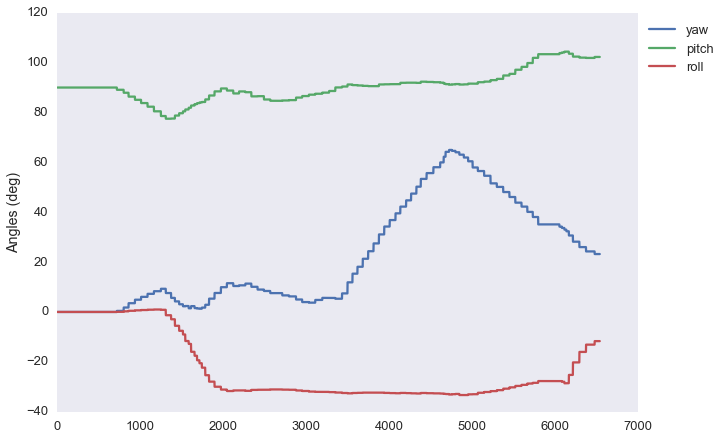

In [259]:
plt.plot(angles[:,0] * 180 / np.pi, label = 'yaw')
plt.plot(angles[:,1] * 180 / np.pi, label = 'pitch')
plt.plot(angles[:,2] * 180 / np.pi, label = 'roll')
plt.ylabel('Angles (deg)')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])


In [ ]:
plt.plot(q[:,8])

In [ ]:
RJ = R[-1,:,:].dot(J[-1,:3,:5])
plt.plot(RJ)

In [ ]:
 R[0,:,:]

In [ ]:
J[100]

In [ ]:
plt.plot(J[:,1,:])

In [ ]:
plt.plot(q[:,-2])